## This script file is used to analysis Auto.csv dataset.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [95]:
file = pd.read_csv('data/Auto.csv')
file = file.drop('index', axis=1)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [96]:
description = file.describe()
print(description)

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

<b>(a) Which of the predictors are quantitative, and which are qualitative?</b>

    quantitative: "mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"
    qualitative:  "year", "origin", "name"

<b>(b) What is the range of each quantitative predictor? You can answer this using the range() function.</b>

    Since for every attribute the value is non-null and the min of every attribute is larger than 0, that means there is no missing data.
    
    And I can get the range from the min and max value for every attribute.
    "mpg":          9 ~ 46.6
    "cylinders":    3 ~ 8
    "displacement": 68 ~ 455
    "horsepower":   46 ~ 230
    "weight":       1613 ~ 5140
    "acceleration": 8 ~ 24.8

<b>(c) What is the mean and standard deviation of each quantitative predictor?</b>

                    mean          std
    "mpg":          23.445918     7.805007
    "cylinders":    5.471939      1.705783
    "displacement": 194.411990    104.644004
    "horsepower":   104.469388    38.491160
    "weight":       2977.584184   849.402560
    "acceleration": 15.541327     2.758864

<b>(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?</b>

In [97]:
lineTobeRemoved = np.arange(10, 85, 1)
fileTemp = file.drop(file.index[lineTobeRemoved])
fileTemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 391
Data columns (total 9 columns):
mpg             317 non-null float64
cylinders       317 non-null int64
displacement    317 non-null float64
horsepower      317 non-null int64
weight          317 non-null int64
acceleration    317 non-null float64
year            317 non-null int64
origin          317 non-null int64
name            317 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 24.8+ KB


In [98]:
description = fileTemp.describe()
print(description)

              mpg   cylinders  displacement  horsepower       weight  \
count  317.000000  317.000000    317.000000  317.000000   317.000000   
mean    24.374763    5.381703    187.880126  101.003155  2938.854890   
std      7.872565    1.658135    100.169973   36.003208   811.640668   
min     11.000000    3.000000     68.000000   46.000000  1649.000000   
25%     18.000000    4.000000    101.000000   75.000000  2215.000000   
50%     23.900000    4.000000    146.000000   90.000000  2795.000000   
75%     30.500000    6.000000    250.000000  115.000000  3520.000000   
max     46.600000    8.000000    455.000000  230.000000  4997.000000   

       acceleration        year      origin  
count    317.000000  317.000000  317.000000  
mean      15.704101   77.123028    1.599369  
std        2.719913    3.127158    0.819308  
min        8.500000   70.000000    1.000000  
25%       14.000000   75.000000    1.000000  
50%       15.500000   77.000000    1.000000  
75%       17.300000   80.0000

After remove it, we can see

                    range          mean           std    
    "mpg":          11 ~ 46.6      24.374763      7.872565
    "cylinders":    3 ~ 8          5.381703       1.658135
    "displacement": 68 ~ 455       187.880126     100.169973
    "horsepower":   46 ~ 230       101.003155     36.003208
    "weight":       1649 ~ 4997    2938.854890    811.640668
    "acceleration": 8.5 ~ 24.8     15.704101      2.719913

<b>(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.</b>

/Users/ruotwang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


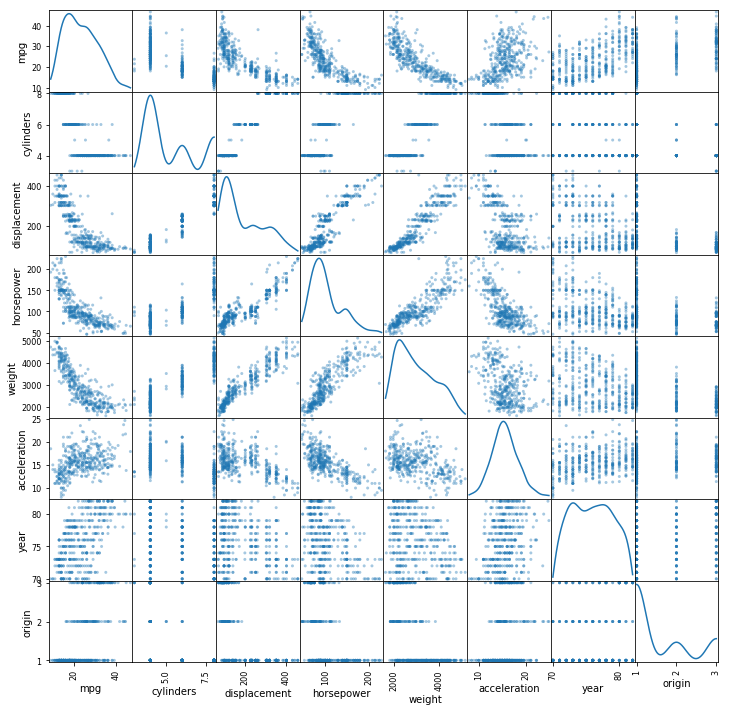

In [92]:
scatter_matrix(file, alpha=0.4, figsize=(12, 12), diagonal='kde')
plt.show()

From the scatterplot, we can conclude:
1. when the value of 'mpg' goes up, values of 'displacement', 'horsepower' and 'weight' all have significant declining trend.
1. when the value of 'displacement' goes up, values of 'mpg' and 'acceleration' have declining trend, while values of 'horsepower' and 'weight' have increasing trend.
1. when the value of 'horsepower' goes up, values of 'mpg' and 'acceleration' have declining trend, while values of 'displacement' and 'weight' have increasing trend.
1. when the value of 'weight' goes up, value of 'mpg' has declining trend, while 'displacement' and 'horsepower' have increasing trend
1. as time goes by, the maximum of mpg is going up (due to the development of techonogy)

<b>(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.</b>

Based on the finding above, I think 'displacement', 'horsepower', 'weight' and 'year' should be useful in predicting mpg